<a href="https://colab.research.google.com/github/yuanshanmian/GZU_Courses/blob/main/EX2_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-contrib-python

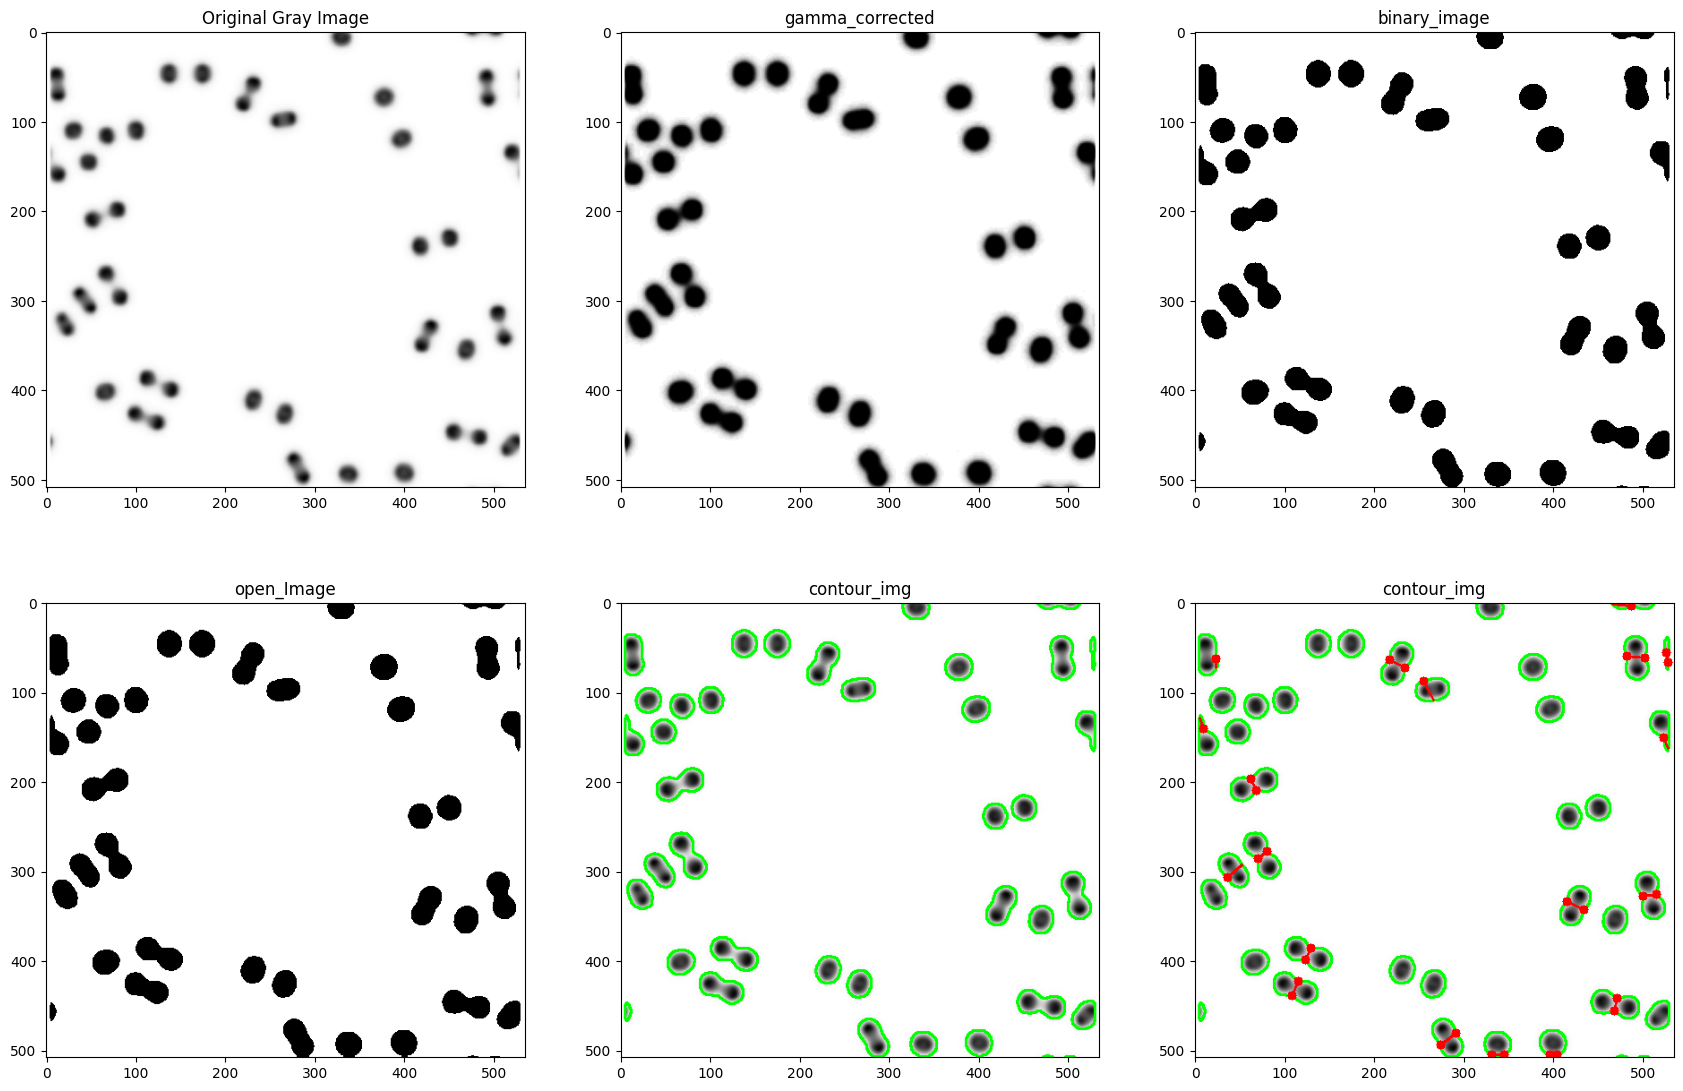

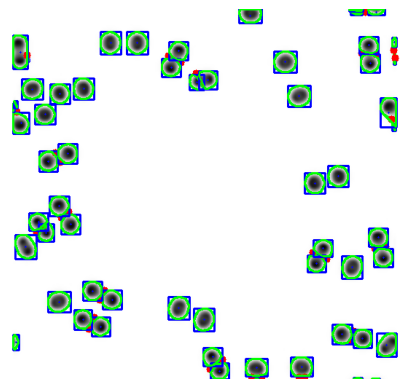

num =  59


In [ ]:
import matplotlib.pyplot as plt
import cv2

# 读取图像
gray_image = cv2.imread('./a.png', cv2.IMREAD_GRAYSCALE)

# 自适应 Otsu 方法
def adaptive_otsu(img_g):
    h, w = img_g.shape
    mask = np.zeros_like(img_g)
    winHalfWidth = 10
    localVarThresh = 0.002

    for i in range(0, w):
        new_img = img_g[:, max(1, i - winHalfWidth): min(w, i + winHalfWidth)]
        th, th_otsu = cv.threshold(new_img, 0, 255, cv.THRESH_OTSU)
        intile = np.var(new_img / 255)
        if intile > localVarThresh:
            _, mask[:, i:i + 1] = cv.threshold(img_g[:, i:i + 1], th, 255, cv.THRESH_BINARY)
        else:
            mask[:, i:i + 1] = 255

    return mask

# 定义伽马参数
gamma = 10

# 应用伽马变换
gamma_corrected = np.uint8(((gray_image / 255.0) ** gamma) * 255)


# 调用自适应 Otsu 方法进行二值化
binary_image = adaptive_otsu(gamma_corrected)

# 使用3x3的核对图像进行开运算
kernel = np.ones((3, 3), np.uint8)
image_bin = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel)

# 提取轮廓
contours, _ = cv.findContours(255 - image_bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 在原始图像上绘制轮廓
contour_img = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)
cv.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# 绘制原始图像、均衡化后的图像和腐蚀后的图像
plt.figure(figsize=(21, 21))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB))
plt.title('Original Gray Image')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_GRAY2RGB))
plt.title('gamma_corrected')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_GRAY2RGB))
plt.title('binary_image')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(image_bin, cv2.COLOR_GRAY2RGB))
plt.title('open_Image')

plt.subplot(3, 3, 5)
plt.imshow(contour_img)
plt.title('contour_img')

'''
# 'binary_image' 是之前代码中的二值图像
for cnt in contours:
    hull = cv.convexHull(cnt, returnPoints=True)  # 返回凸包的点集合
    defects = cv.convexityDefects(cnt, cv.convexHull(cnt, returnPoints=False))
    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            if d > 230:  # 缺陷深度阈值
                start = tuple(cnt[s][0])
                end = tuple(cnt[e][0])
                far = tuple(cnt[f][0])  # 获取凸缺陷点
                # 可视化：在图像上绘制凸缺陷点
                cv.circle(contour_img, far, 5, [255, 0, 0], -2)
                # 在二值图像上绘制对应的凸缺陷点
                cv.circle(image_bin, far, 5, [0], -1)
                '''

# 'binary_image' 是之前代码中的二值图像
for cnt in contours:
    hull = cv.convexHull(cnt, returnPoints=True)  # 返回凸包的点集合
    defects = cv.convexityDefects(cnt, cv.convexHull(cnt, returnPoints=False))
    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            if d > 230:  # 缺陷深度阈值
                start = tuple(cnt[s][0])
                end = tuple(cnt[e][0])
                far = tuple(cnt[f][0])  # 获取凸缺陷点
                # 可视化：在图像上绘制凸缺陷点
                cv.circle(contour_img, far, 5, [255, 0, 0], -2)
                cv.circle(image_bin, far, 5, [255], -1)

                # 找到凸缺陷点中深度最大和次大的点
                depth_points = [defects[i, 0] for i in range(defects.shape[0])]
                depth_points.sort(key=lambda x: x[3], reverse=True)
                max_depth_point = tuple(cnt[depth_points[0][2]][0])
                second_max_depth_point = tuple(cnt[depth_points[1][2]][0])

                # 在图像上绘制连接最大深度点和次大深度点的线段
                cv.line(contour_img, max_depth_point, second_max_depth_point, [255, 0, 0], 2)
                cv.line(image_bin, max_depth_point, second_max_depth_point, [255], 2)


# 显示最终结果
plt.subplot(3, 3, 6)
plt.imshow(contour_img)
plt.title('contour_img')
plt.show()


# 修改二值图像后再次查找轮廓
contours, _ = cv.findContours(255 - image_bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 统计轮廓数量
num_contours = len(contours)

# 绘制每个轮廓的包围矩形和中心点
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(contour_img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # 绿色矩形
    cx = x + w//2
    cy = y + h//2
    cv.circle(contour_img, (cx, cy), 1, (0, 0, 255), -1)  # 红色中心点

    # 绘制凸包
    cv.drawContours(contour_img, [cv.convexHull(cnt)], 0, (0, 255, 0), 2)

# 显示最终结果
plt.imshow(contour_img)
plt.axis('off')
plt.show()

print('num = ', num_contours)



<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 23792 (\N{CJK UNIFIED IDEOGRAPH-5CF0}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
<ipython-input-96-4a952baad836>:98: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
<ipyth

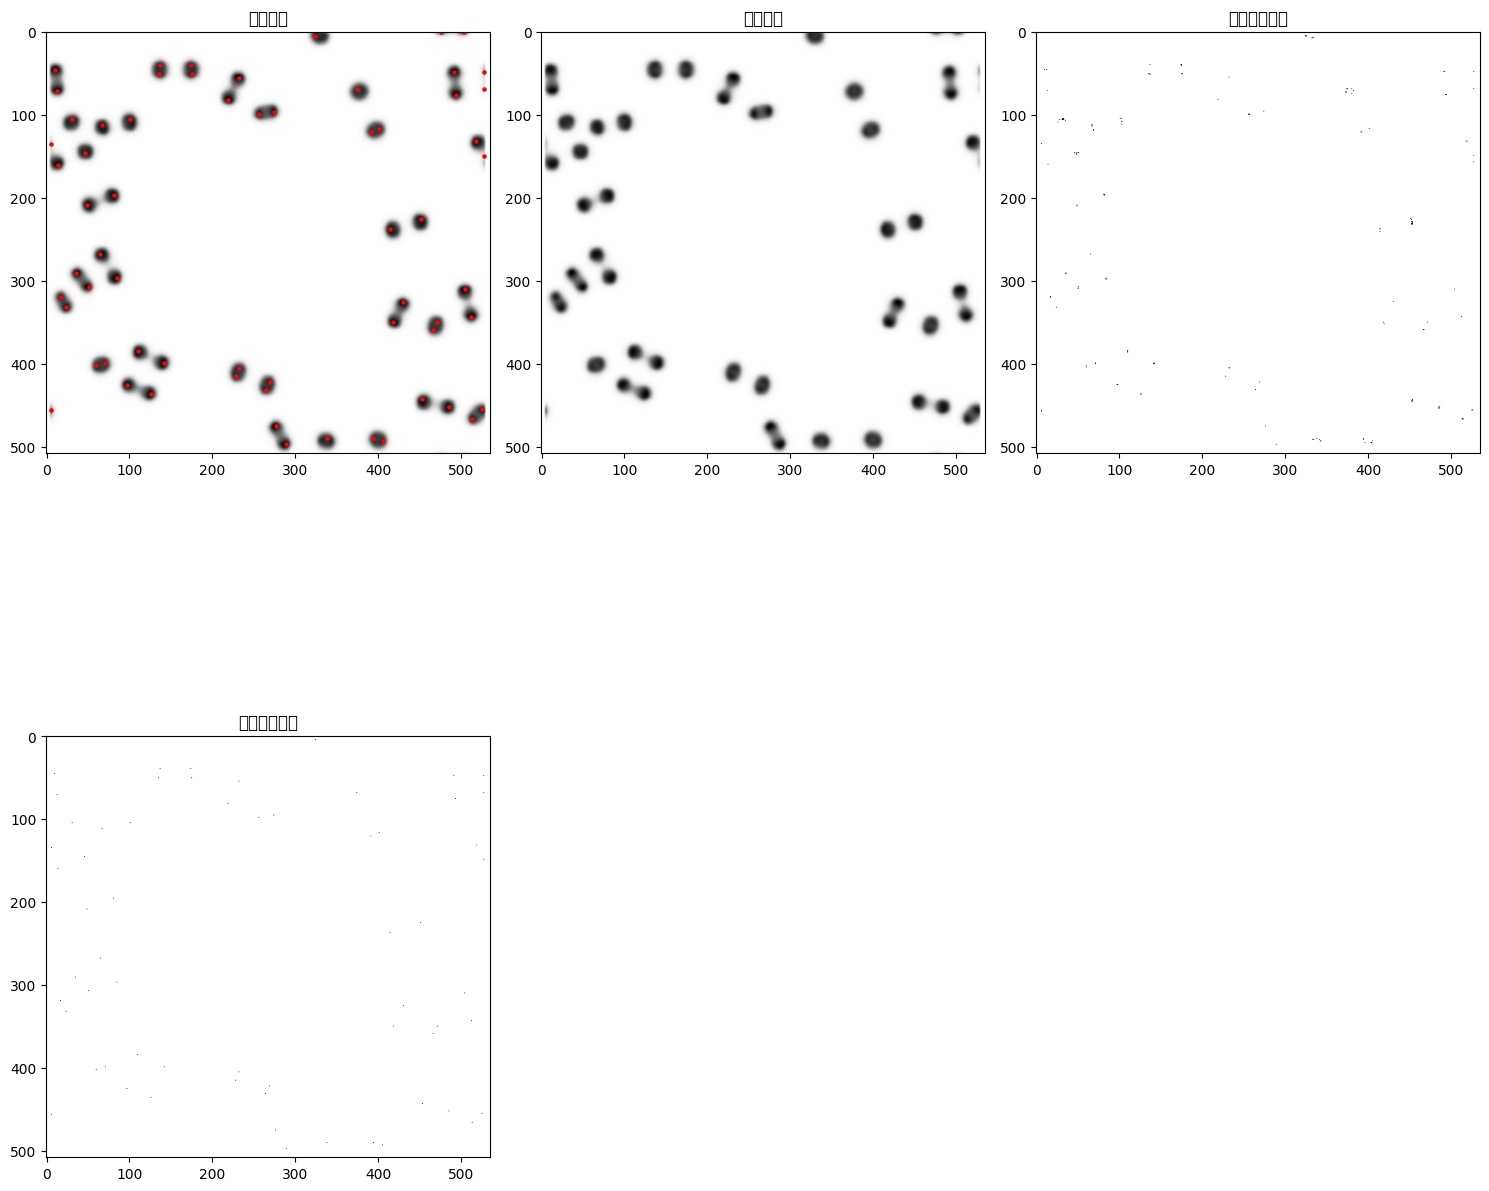

num =  64


In [ ]:
import numpy as np
from scipy.ndimage import maximum_filter, generate_binary_structure, binary_erosion
import matplotlib.pyplot as plt
import cv2

# 读取灰度图像
image_array = 255 - cv2.imread('./a.png', cv2.IMREAD_GRAYSCALE)

# 定义函数进行峰值检测
def detect_peaks(image, threshold=0):
    """
    对图像进行峰值检测，使用局部最大值滤波器。
    返回峰值的布尔掩码（即像素值是其邻域最大值时为1，否则为0）
    """

    # 定义一个8连接的邻域结构
    neighborhood = generate_binary_structure(2, 2)

    # 应用局部最大值滤波器；所有邻域中最大值的像素被设置为1
    local_max = maximum_filter(image, footprint=neighborhood) == image

    # local_max是一个包含我们寻找的峰值的掩码，但也包含了背景。
    # 为了分离出峰值，我们必须从掩码中去除背景。

    # 创建背景的掩码
    background = (image == 0)

    # 一个小技巧：我们必须侵蚀背景，以成功地从local_max中减去它，否则将出现一条线
    # 沿着背景边界（局部最大值滤波器的副作用）
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    # 通过从local_max掩码中移除背景来获得最终的掩码，仅包含峰值（xor操作）
    detected_peaks = local_max ^ eroded_background

    # 根据阈值对峰值进行处理
    detected_peaks[image <= threshold] = False

    return detected_peaks

# 后处理函数：连接接近的峰值
def post_process_peaks(peaks, distance_threshold):
    # 获取峰值的坐标
    peaks_y, peaks_x = np.where(peaks)
    num_peaks = len(peaks_y)  # 获取峰值的数量

    # 计算每个峰值之间的距离
    distances = np.zeros((num_peaks, num_peaks))
    for i in range(num_peaks):
        for j in range(i + 1, num_peaks):
            distances[i, j] = np.sqrt((peaks_x[i] - peaks_x[j]) ** 2 + (peaks_y[i] - peaks_y[j]) ** 2)
            distances[j, i] = distances[i, j]  # 对称矩阵

    # 将距离小于阈值的峰值合并为一个峰值
    merged_peaks = np.copy(peaks)
    for i in range(num_peaks):
        for j in range(i + 1, num_peaks):
            if distances[i, j] < distance_threshold:
                merged_peaks[peaks_y[j], peaks_x[j]] = False

    return merged_peaks


# 定义阈值
threshold = 30
distance_threshold = 10

# 应用检测并绘制结果
plt.figure(figsize=(15, 15))
detected_peaks = detect_peaks(image_array, threshold)

# 进行后处理：连接接近的峰值
merged_peaks = post_process_peaks(detected_peaks, distance_threshold)

# 显示检测到的峰值
plt.subplot(2, 3, 4)
plt.imshow(255 - merged_peaks, cmap='gray')
plt.title("检测到的峰值")

# 绘制原始图像
plt.subplot(2, 3, 1)
plt.imshow(255 - image_array, cmap='gray')
plt.title("原始图像")

# 在原图上绘制红点
peaks_y, peaks_x = np.where(merged_peaks)
plt.scatter(peaks_x, peaks_y, color='red', s=5)

# 绘制原始图像
plt.subplot(2, 3, 2)
plt.imshow(255 - image_array, cmap='gray')
plt.title("原始图像")

# 显示检测到的峰值
plt.subplot(2, 3, 3)
plt.imshow(255 - detected_peaks, cmap='gray')
plt.title("检测到的峰值")

plt.tight_layout()
plt.show()

print("num = ", len(peaks_y))

Number of cells: 32


<ipython-input-24-8abee331235c>:51: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cell_center = ndimage.measurements.center_of_mass(cell_mask_single)


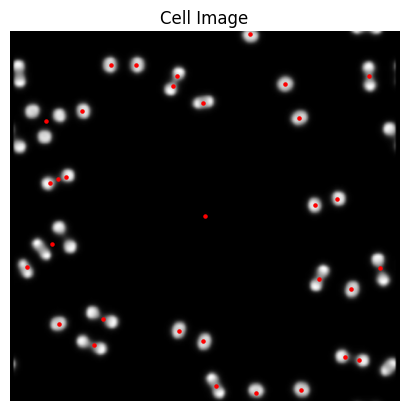

In [ ]:
import cv2
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import matplotlib.pyplot as plt

# 读取灰度图像
image = 255 - cv2.imread('./a.png', cv2.IMREAD_GRAYSCALE)

# 预处理：去除噪声和平滑图像
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)

# 确定图像中的背景和前景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 使用标记函数对前景区域进行标记
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# 应用分水岭算法
markers = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)
image_copy = image.copy()

# 创建分割后的细胞掩码
cell_mask = np.zeros_like(image_copy, dtype=np.uint8)
cell_mask[markers > 1] = 255  # 将非背景部分置为255

# 计数标记区域的数量（不包括背景）
num_cells = len(np.unique(markers)) - 1
print("Number of cells:", num_cells)

# 显示灰度图像
plt.imshow(image, cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.title('Cell Image')

# 提取细胞的中心坐标
markers_filtered = markers.copy()
markers_filtered[markers_filtered == -1] = 0
markers_labels = np.unique(markers_filtered)[1:]
cell_centers = []
for label in markers_labels:
    cell_mask_single = (markers_filtered == label).astype(np.uint8)
    cell_center = ndimage.measurements.center_of_mass(cell_mask_single)
    cell_centers.append(cell_center)

# 绘制细胞中心点
cell_centers = np.array(cell_centers)
plt.scatter(cell_centers[:, 1], cell_centers[:, 0], color='red', s=5)  # 注意坐标位置的转换

plt.show()


46
Number of cells: 46


<ipython-input-53-d7652d932a8d>:102: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cell_center = ndimage.measurements.center_of_mass(cell_mask_single)


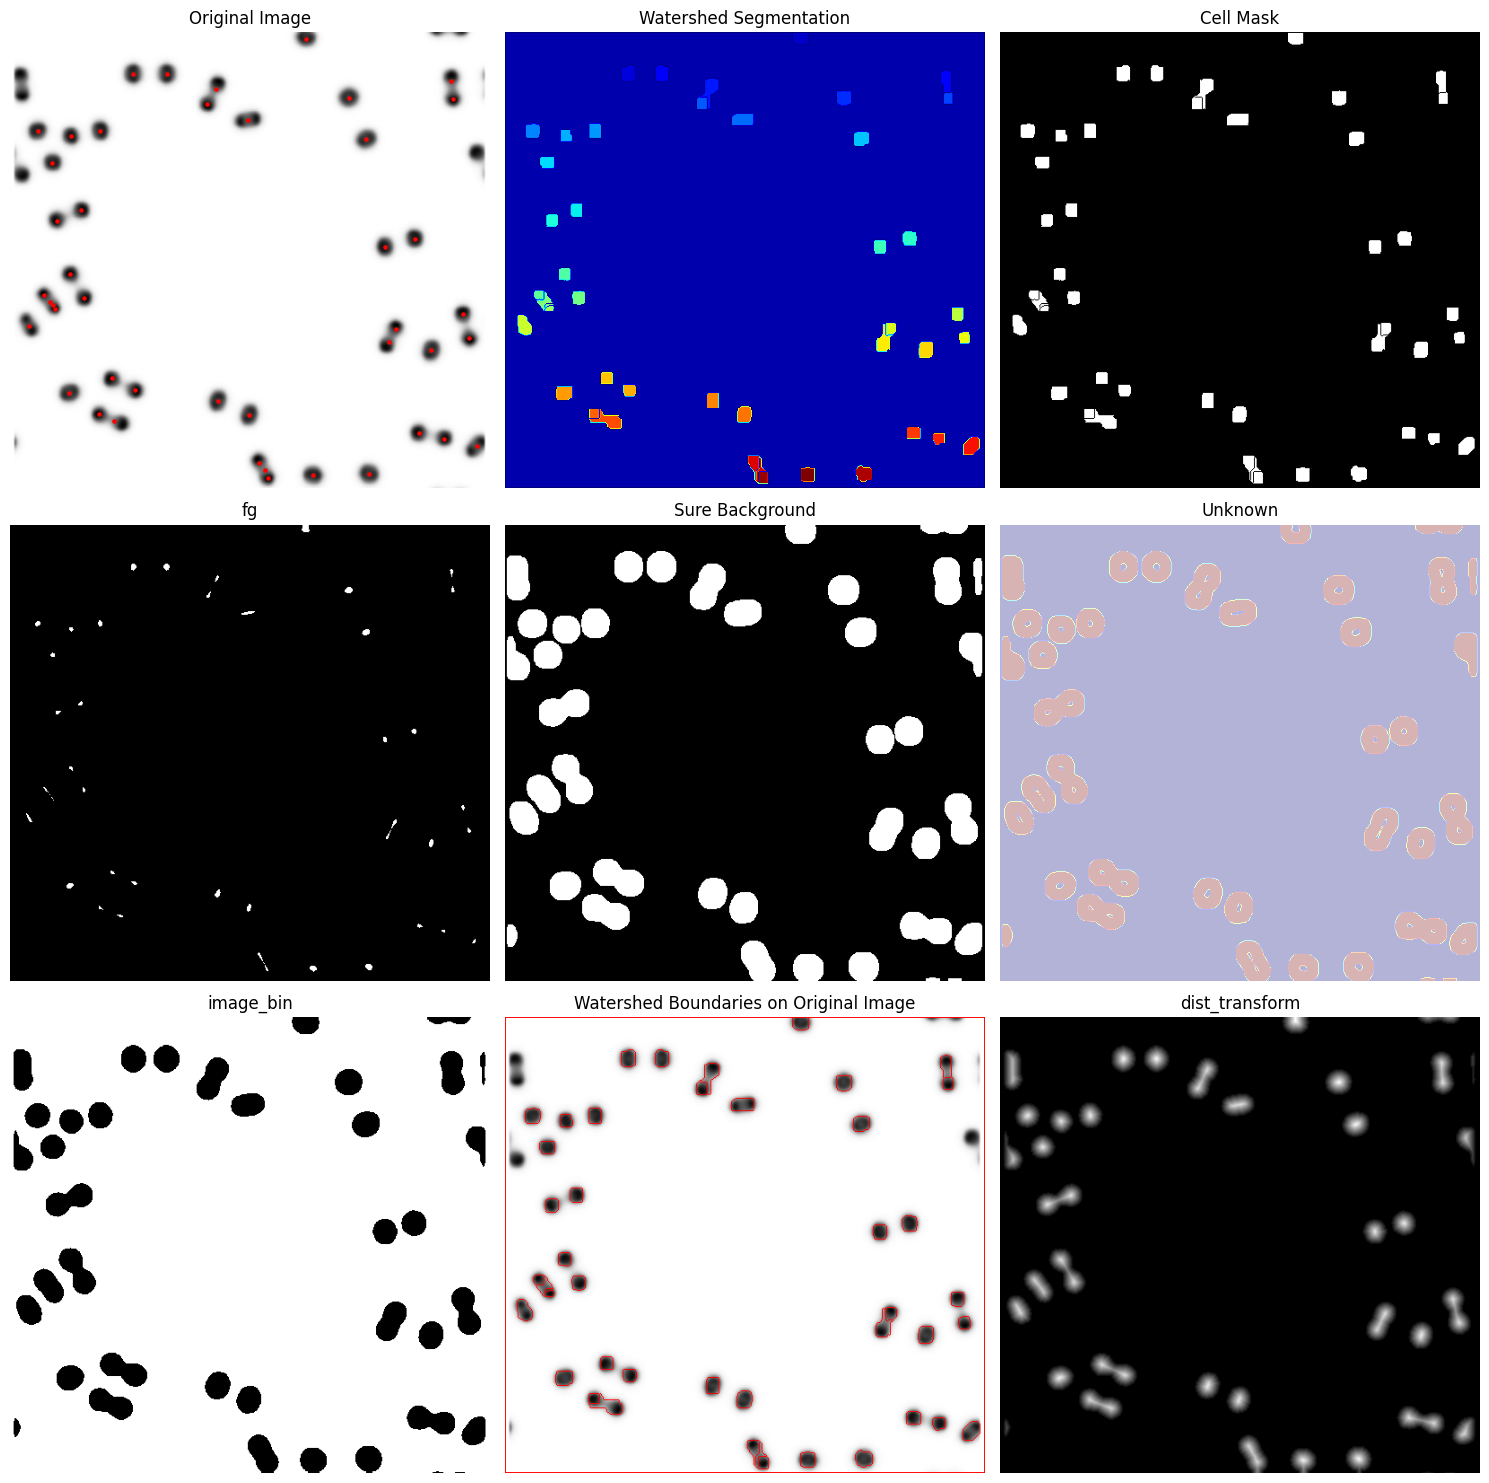

In [ ]:
import cv2 as cv
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# 读取灰度图像
image = cv2.imread('./a.png', cv2.IMREAD_GRAYSCALE)

# 自适应 Otsu 方法
def adaptive_otsu(img_g):
    h, w = img_g.shape
    mask = np.zeros_like(img_g)
    winHalfWidth = 10
    localVarThresh = 0.002

    for i in range(0, w):
        new_img = img_g[:, max(1, i - winHalfWidth): min(w, i + winHalfWidth)]
        th, th_otsu = cv.threshold(new_img, 0, 255, cv.THRESH_OTSU)
        intile = np.var(new_img / 255)
        if intile > localVarThresh:
            _, mask[:, i:i + 1] = cv.threshold(img_g[:, i:i + 1], th, 255, cv.THRESH_BINARY)
        else:
            mask[:, i:i + 1] = 255
    return mask

# 定义伽马参数
gamma = 10

# 应用伽马变换
gamma_corrected = np.uint8(((image / 255.0) ** gamma) * 255)

# 调用自适应 Otsu 方法进行二值化
binary_image = adaptive_otsu(gamma_corrected)

# 使用3x3的核对图像进行开运算
kernel = np.ones((3, 3), np.uint8)
image_bin = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel)

# 确定图像中的背景和前景区域
sure_bg = cv.erode(image_bin, kernel, iterations = 2)
sure_bg = 255 - sure_bg
dist_transform = cv2.distanceTransform(255 - image_bin, cv2.DIST_L2, 5)
# print(dist_transform.max())
ret, sure_fg = cv2.threshold(dist_transform, 0.75 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.subplot(337)
plt.imshow(sure_fg, cmap='gray')
plt.title('fg')

# 使用标记函数对前景区域进行标记
ret, markers = cv2.connectedComponents(sure_fg)
print(ret)
markers = markers + 1
markers[unknown == 255] = 0

# 应用分水岭算法
markers = cv2.watershed(cv2.cvtColor(255-image, cv2.COLOR_GRAY2BGR), markers)
image_copy = image.copy()


# Convert the single-channel grayscale image to a three-channel image
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Mark the watershed boundaries on the original image with red color
image_rgb[markers == -1] = [255, 0, 0]  # Red color for boundary pixels

# Display the original image with watershed boundaries marked
plt.subplot(338)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Watershed Boundaries on Original Image')



# 创建分割后的细胞掩码
cell_mask = np.zeros_like(image_copy, dtype=np.uint8)
cell_mask[markers > 1] = 255  # 将非背景部分置为255

# 计数标记区域的数量（不包括背景）
num_cells = len(np.unique(markers)) - 1
print("Number of cells:", num_cells)



# 显示灰度图像
plt.subplot(331)
plt.imshow(image, cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.title('Original Image')

# 提取细胞的中心坐标
markers_filtered = markers.copy()
markers_filtered[markers_filtered == -1] = 0
markers_labels = np.unique(markers_filtered)[1:]
cell_centers = []
for label in markers_labels:
    cell_mask_single = (markers_filtered == label).astype(np.uint8)
    cell_center = ndimage.measurements.center_of_mass(cell_mask_single)
    cell_centers.append(cell_center)

# 绘制细胞中心点
cell_centers = np.array(cell_centers)
plt.scatter(cell_centers[1:, 1], cell_centers[1:, 0], color='red', s=5)  # 注意坐标位置的转换


# 显示分水岭算法处理后的结果
plt.subplot(332)
plt.imshow(markers, cmap='jet')
plt.axis('off')
plt.title('Watershed Segmentation')

# 显示细胞掩码
plt.subplot(333)
plt.imshow(cell_mask, cmap='gray')
plt.axis('off')
plt.title('Cell Mask')

# 显示前景和背景
plt.subplot(334)
plt.imshow(sure_fg, cmap='gray')
#plt.imshow(unknown, cmap='jet', alpha=0.3)  # 使用jet colormap显示unknown，透明度为0.3
plt.axis('off')
plt.title('fg')

plt.subplot(335)
plt.imshow(sure_bg, cmap='gray')
#plt.imshow(unknown, cmap='jet', alpha=0.3)  # 使用jet colormap显示unknown，透明度为0.3
plt.axis('off')
plt.title('Sure Background')

plt.subplot(337)
plt.imshow(image_bin, cmap='gray')
#plt.imshow(unknown, cmap='jet', alpha=0.3)  # 使用jet colormap显示unknown，透明度为0.3
plt.axis('off')
plt.title('image_bin')



plt.subplot(339)
plt.imshow(dist_transform, cmap='gray')
#plt.imshow(unknown, cmap='jet', alpha=0.3)  # 使用jet colormap显示unknown，透明度为0.3
plt.axis('off')
plt.title('dist_transform')

plt.subplot(336)
plt.imshow(unknown, cmap='jet', alpha=0.3)  # 使用jet colormap显示unknown，透明度为0.3
plt.axis('off')
plt.title('Unknown')

plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>
(508, 535, 3)


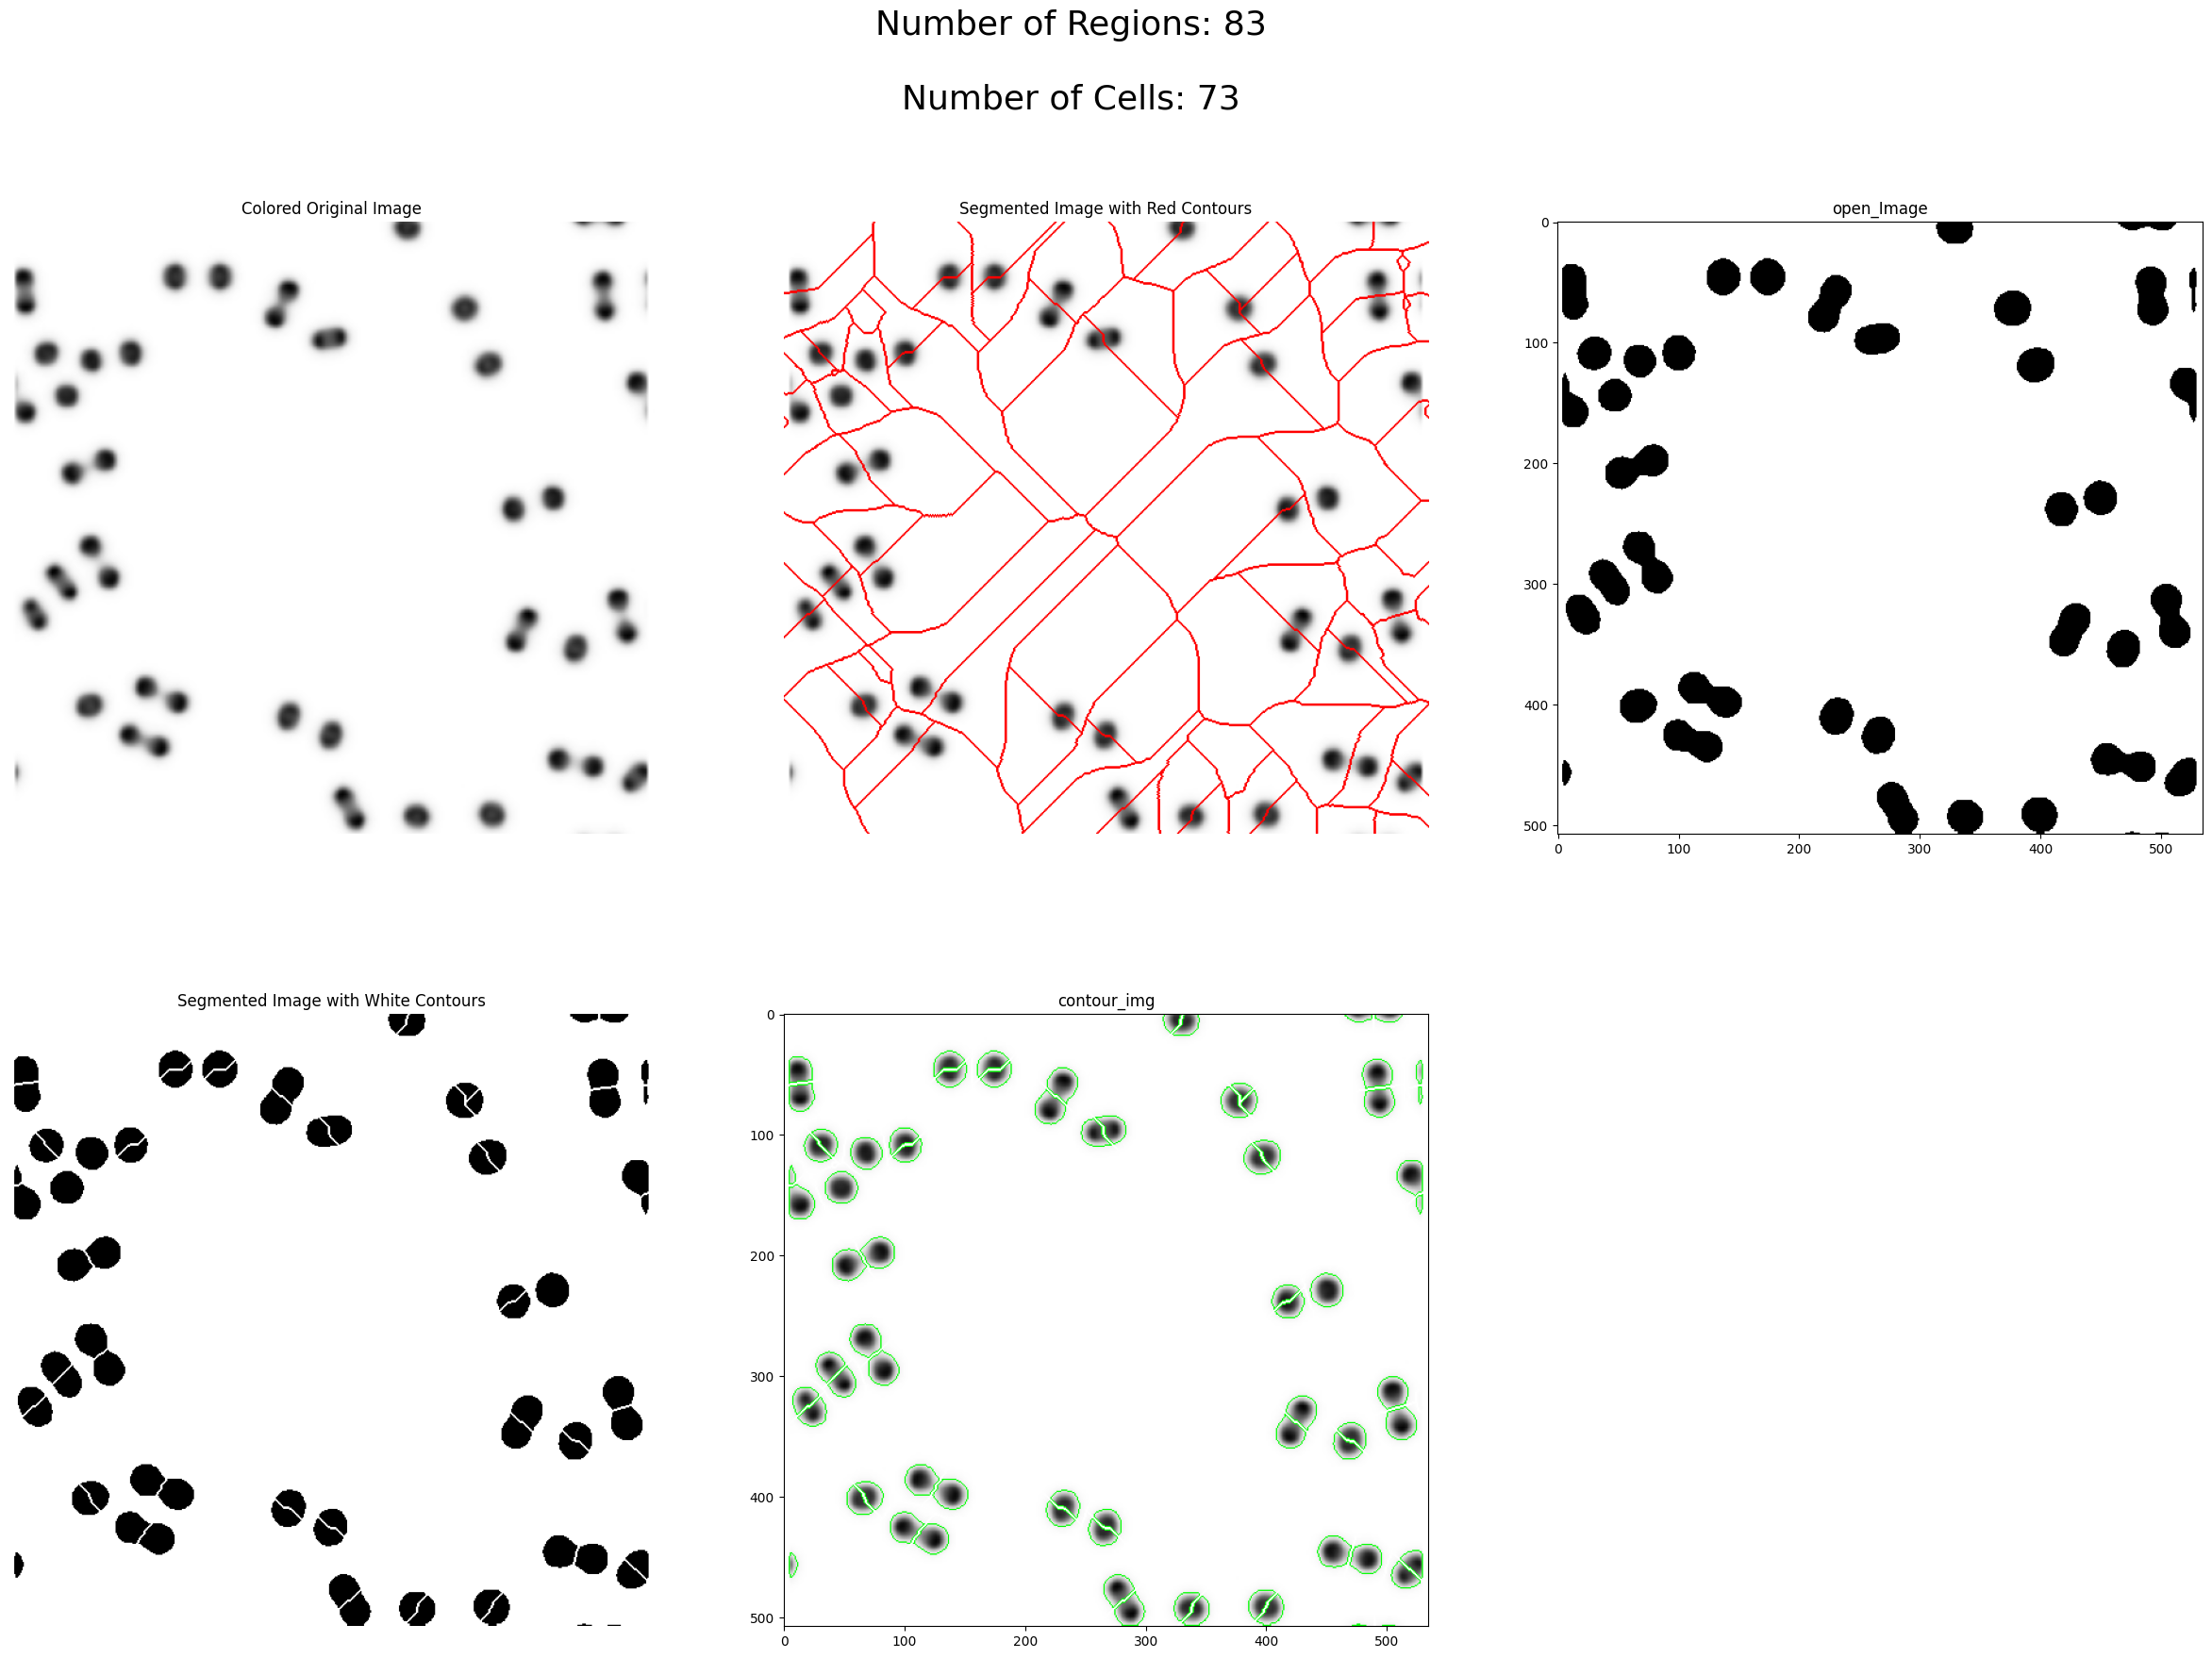

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io, color, segmentation, measure

# 读取图像
image_file = 'a.png'
# image = io.imread(image_file, as_gray=True)
image = cv2.imread('./a.png', cv2.IMREAD_GRAYSCALE)

# 转换为彩色图像（分水岭算法要求输入彩色图像）
# image_color = color.gray2rgb(image)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# 应用分水岭算法
labels = segmentation.watershed(image,connectivity = 2)

# 计数区域
regions = measure.regionprops(labels)
num_regions = len(regions)

# 创建复制图像
image_with_contours = np.copy(image_color)

# 绘制轮廓
contours = segmentation.find_boundaries(labels)
image_with_contours[contours] = [255, 0, 0]  # 在复制图上绘制红色线条

# 显示结果
plt.figure(figsize=(30, 20))
plt.subplot(2, 3, 1)
plt.imshow(image_color)
plt.title('Colored Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_with_contours)
plt.title('Segmented Image with Red Contours')
plt.axis('off')



print(type(img_new))
print(img_new.shape)


# 自适应 Otsu 方法
def adaptive_otsu(img_g):
    h, w = img_g.shape
    mask = np.zeros_like(img_g)
    winHalfWidth = 10
    localVarThresh = 0.002

    for i in range(0, w):
        new_img = img_g[:, max(1, i - winHalfWidth): min(w, i + winHalfWidth)]
        th, th_otsu = cv2.threshold(new_img, 0, 255, cv2.THRESH_OTSU)
        intile = np.var(new_img / 255)
        if intile > localVarThresh:
            _, mask[:, i:i + 1] = cv.threshold(img_g[:, i:i + 1], th, 255, cv.THRESH_BINARY)
        else:
            mask[:, i:i + 1] = 255

    return mask

# 定义伽马参数
gamma = 10

# 应用伽马变换
gamma_corrected = np.uint8(((image / 255.0) ** gamma) * 255)


# 调用自适应 Otsu 方法进行二值化
binary_image = adaptive_otsu(gamma_corrected)

# 使用3x3的核对图像进行开运算
kernel = np.ones((3, 3), np.uint8)
image_bin = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel)


image_seg = np.copy(image_bin)
image_seg[contours] = 255  # 在复制图上绘制白色线条


# 提取轮廓
contours, _ = cv.findContours(255 - image_seg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 在原始图像上绘制轮廓
# contour_img = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)
contour_img = color.gray2rgb(gray_image)
cv.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

# 绘制原始图像、均衡化后的图像和腐蚀后的图像

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(image_seg, cv2.COLOR_GRAY2RGB))
plt.title('Segmented Image with White Contours')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(image_bin, cv2.COLOR_GRAY2RGB))
plt.title('open_Image')

plt.subplot(2, 3, 5)
plt.imshow(contour_img)
plt.title('contour_img')


num_contours = len(contours)


# 显示区域数量
plt.suptitle(f'Number of Regions: {num_regions}\n\nNumber of Cells: {num_contours}', fontsize=26)

plt.show()